# Characteristics of Businesses - Group Exercise

In [1]:
import pandas as pd
import requests

tech_variables = 'https://api.census.gov/data/2018/abstcb/variables.html'
owner_variables = 'https://api.census.gov/data/2018/abscbo/variables.html'
characteristics_variables = 'https://api.census.gov/data/2018/abscb/variables.html'
company_summary_variables = 'https://api.census.gov/data/2018/abscs/variables.html'


### Get Tables of Variables

In [2]:
tech_vars = pd.read_html(tech_variables)[0]
owner_vars = pd.read_html(owner_variables)[0]
characteristic_vars = pd.read_html(characteristics_variables)[0]
company_summary_vars = pd.read_html(company_summary_variables)[0]

tech_vars = tech_vars[[_ for _ in tech_vars.columns[:2]]]
owner_vars = owner_vars[[_ for _ in owner_vars.columns[:2]]]
characteristic_vars = characteristic_vars[[_ for _ in characteristic_vars.columns[:2]]]
company_summary_vars = company_summary_vars[[_ for _ in company_summary_vars.columns[:2]]] 

tech_vars.rename(columns = {'Label': 'Tech Labels'}, inplace = True)
owner_vars.rename(columns = {'Label': 'Owner Labels'}, inplace = True)
characteristic_vars.rename(columns = {'Label': 'Characteristic Labels'}, inplace = True)
company_summary_vars.rename(columns = {'Label': 'Company Summary Labels'}, inplace = True)

In [3]:
grouped_tables = pd.merge(tech_vars, owner_vars, left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables = pd.merge(grouped_tables, characteristic_vars, left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables = pd.merge(grouped_tables, company_summary_vars , left_on = 'Name', right_on = 'Name', how = 'outer')

grouped_tables.fillna("-", inplace = True)

grouped_tables = grouped_tables[(~grouped_tables['Tech Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Owner Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Characteristic Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Company Summary Labels'].str.contains('Standard error|standard error'))]

grouped_tables.reset_index(drop = True, inplace = True)
grouped_tables = grouped_tables[:-2]

In [24]:
print("\n------ Displaying top 10 rows of variable tables. ------\n")
grouped_tables.head(10)


------ Displaying top 10 rows of variable tables. ------



,Name,Tech Labels,Owner Labels,Characteristic Labels,Company Summary Labels
0,EMP,Number of employees,-,Number of employees,Number of employees
1,EMP_PCT,Percent of employees (%),-,Percent of employees (%),-
2,ETH_GROUP,Ethnicity code,-,Ethnicity code,Ethnicity code
3,FACTORS_P,Factors adversely affecting technology product...,-,-,-
4,FACTORS_U,Factors adversely affecting technology use code,-,-,-
5,FIRMPDEMP,Number of employer firms,-,Number of employer firms,Number of employer firms
6,FIRMPDEMP_PCT,Percent of employer firms (%),-,Percent of employer firms (%),-
7,for,Census API FIPS 'for' clause,Census API FIPS 'for' clause,Census API FIPS 'for' clause,Census API FIPS 'for' clause
8,GEO_ID,Geographic identifier code,Geographic identifier code,Geographic identifier code,Geographic identifier code
9,GEOCOMP,GEO_ID Component,GEO_ID Component,GEO_ID Component,GEO_ID Component


In [4]:
# grouped_tables.sort_values(by = 'Name', ascending = False)
vars_of_interest = [
    'NAICS2017',
    'YIBSZFI',
    'SEX',
    'QDESC',
    'NSFSZFI',
    'GEO_ID',
    'RACE_GROUP',
    'BUSCHAR',
    'OWNER_RACE',
    'OWNER_SEX']
target_subset = grouped_tables[(grouped_tables['Name'].isin(vars_of_interest))]
target_subset = target_subset[['Name','Company Summary Labels','Characteristic Labels','Owner Labels','Tech Labels']]

### Build variable strings to pass to api call


In [5]:
variable_dict = {}
for i,label in enumerate(target_subset.columns[1:]):
    variable_list = []
    for item in target_subset[(target_subset[label] != "-")].Name.tolist():
        variable_list.append(item)
        variable_list.append(f'{item}_LABEL')
    variable_list = [_ for _ in variable_list if _ not in ['GEO_ID_LABEL']]#, 'QDESC_LABEL']]
    in_table = "NAME," + ",".join(variable_list)
    variable_dict[i] = in_table
variable_dict


{0: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,YIBSZFI,YIBSZFI_LABEL',
 1: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YIBSZFI,YIBSZFI_LABEL',
 2: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL',
 3: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL'}

In [6]:
# industry_code = '61'
# qdesc1 = 'B27'

links = [
    f'https://api.census.gov/data/2018/abscs?get={variable_dict[0]},FIRMPDEMP&for=state:*',
    f'https://api.census.gov/data/2018/abscb?get={variable_dict[1]},FIRMPDEMP&for=state:*',
    f'https://api.census.gov/data/2018/abscbo?get={variable_dict[2]},OWNCHAR,OWNCHAR_LABEL&for=us:*&for=QDESC_LABEL=YRACQBUS',
    f'https://api.census.gov/data/2018/abstcb?get={variable_dict[3]},FIRMPDEMP,TECHUSE&for=state:*',
]

def get_data_frame(url):
    return pd.read_csv(url)
    
for link in links:
    print(link)
    print("")

https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP&for=state:*

https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP&for=state:*

https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL&for=us:*&for=QDESC_LABEL=YRACQBUS

https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,FIRMPDEMP,TECHUSE&for=state:*



### The cell below is where the dataframes are first stored.

In [7]:
comp_sum_df = get_data_frame(links[0]) # Company Summary
bus_char_df = business_char_df = get_data_frame(links[1]) # Business Characteristics
bus_own_df = business_own_df = get_data_frame(links[2]) # Business Owners
bus_tech_df = get_data_frame(links[3]) # Business Tech   

In [8]:
df_collection = [comp_sum_df, bus_char_df, bus_own_df, bus_tech_df]    
df_names = ['comp_sum_df', 'bus_char_df', 'bus_own_df', 'bus_tech_df']   

### Clean DataFrames

In [9]:
drop_list = [
    'race_group','sex','yibszfi','qdesc','buschar',
    'owner_race','owner_sex','us','ownchar'
]

for df in df_collection:
    column_names = [_ for _ in df.columns.tolist()]
    new_column_names = [_.replace("[[","").replace('"',"").replace("]","").lower() for _ in column_names]

    df.columns = new_column_names
    df.drop(columns = [_ for _ in new_column_names if ('unnamed' in _ or _ in drop_list)],inplace = True)
    df['name'] = df['name'].apply(lambda x: x.replace("[","").replace('"',""))
    
    if 'sex_label' in df.columns:
        df.rename(columns = {'sex_label': 'gender'}, inplace = True)
    
    if 'owner_sex_label' in df.columns:
        df.rename(columns = {'owner_sex_label': 'gender'}, inplace = True)
    
    if 'naics2017_label' in df.columns:
        df.rename(columns = {'naics2017_label': 'industry'}, inplace = True)
        
    if 'naics2017' in df.columns:
        df.rename(columns = {'naics2017': 'industry_code'}, inplace = True)

### Display some info about dataframes.

In [10]:
for i,df in enumerate(df_collection):
    print('\n############# NEW DATAFRAME ################')
    print('Displaying column value counts where there are fewer than 10 unique values in the column.')
    print(f'\n---  DataFrame: {df_names[i]} ---------------------')
    print(f'Columns: {", ".join(df.columns.tolist())}')
    for column in df:
        if len(df[column].unique().tolist()) < 10:
            print(df[column].value_counts())
            print("")
    print('############# END OF DATAFRAME INFO ################\n\n')


############# NEW DATAFRAME ################
Displaying column value counts where there are fewer than 10 unique values in the column.

---  DataFrame: comp_sum_df ---------------------
Columns: name, geo_id, industry_code, industry, race_group_label, gender, yibszfi_label, firmpdemp, state
Total                                         27311
White                                         11327
Nonminority                                   11320
Minority                                       9285
Asian                                          7748
Black or African American                      6433
Equally minority/nonminority                   6133
American Indian and Alaska Native              4509
Native Hawaiian and Other Pacific Islander     2126
Name: race_group_label, dtype: int64

Total                  44001
Male                   15588
Female                 13737
Equally male/female    12866
Name: gender, dtype: int64

All firms                                   27090
Firms w

In [11]:
comp_sum_df[['industry_code','industry']].drop_duplicates()

,industry_code,industry
0,21,"Mining, quarrying, and oil and gas extraction"
13,23,Construction
22,31-33,Manufacturing
31,48-49,Transportation and warehousing
38,00,Total for all sectors
82,44-45,Retail trade
118,11,"Agriculture, forestry, fishing and hunting"
230,22,Utilities
272,42,Wholesale trade
735,51,Information


NOTE: Ratios are for each set of observations and not industry specific.
Building Plots... Please Wait...
Done... Displaying Plots...


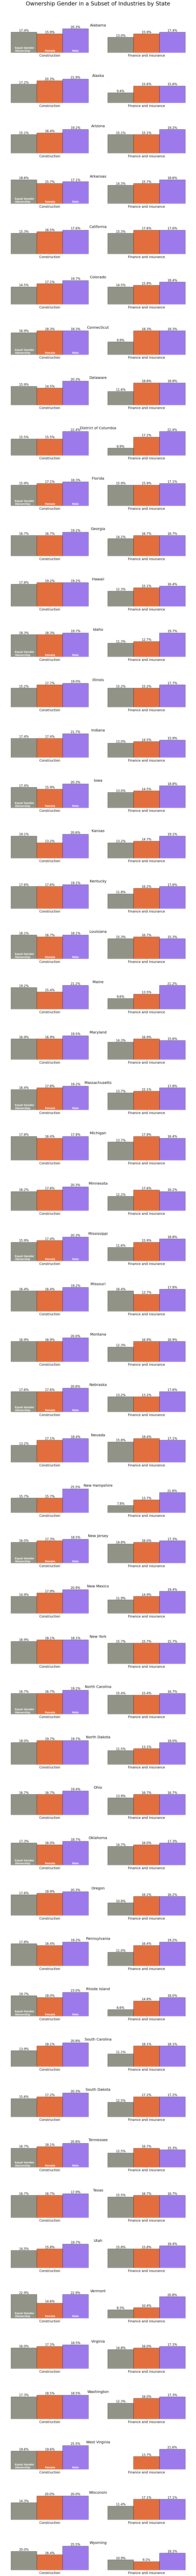

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

targ1 = 23
targ2 = 52
targ1,targ2 = str(targ1), str(targ2)

gender_by_state_cs = comp_sum_df[
    (comp_sum_df['industry_code'].isin([targ1, targ2]))
    ].groupby(by = ['name','industry','gender']
             )[['gender']].agg('count').rename(columns = {'gender': 'gender_count'}).reset_index()

gender_by_state_cs.sort_values(by = ['name', 'industry', 'gender'], inplace = True)
gs = gender_by_state_cs

print('NOTE: Ratios are for each set of observations and not industry specific.')
print('Building Plots... Please Wait...')
fig, axs = plt.subplots(51,1, figsize=(15,200), sharex = False)
fig.suptitle('Ownership Gender in a Subset of Industries by State', fontsize = 30)
colors = {'Female':'#FD6320','Male':'#9567FE', 'Equally male/female': '#919584'}

states = sorted(comp_sum_df.name.unique().tolist())
for i, state in enumerate(states):
    axs[i].set_title(state, fontsize = 20)
    
    subset = gs[
            (gs['name'] == state) &
            (gs['gender'] != 'Total')
        ] 
    industries = sorted(subset.industry.unique().tolist())
    sns.barplot(data = subset, x = 'industry', y = 'gender_count', 
                ax = axs[i], hue = 'gender', 
                palette = colors, 
                edgecolor = 'black')
    
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    
    font = {'color': 'w',
            'weight': 'bold',
            'size': 14,
           }
    if i % 3 == 0:
        axs[i].text(-0.36,0.65, "Equal Gender\nOwnership", fontdict = font)
        axs[i].text(-0.05,0.65, "Female", fontdict = font)
        axs[i].text(0.23,0.65, "Male", fontdict = font)
    
    axs[i].get_legend().remove()
    axs[i].tick_params(left = False)
    axs[i].set_yticklabels('')
    
    gender_count = subset['gender_count'].sum()
    for c in axs[i].containers:
        labels = [
            f'{(h/gender_count)*100:0.1f}%' if (
                h := v.get_height()) > 0 else "" for v in c
        ]
    
        axs[i].bar_label(c,labels=labels,label_type = 'edge',fontsize = 17,color= 'black')
    axs[i].tick_params(axis = 'x', labelsize = 18)
    
plt.tight_layout()
plt.subplots_adjust(hspace = 1,top = 0.97)
sns.despine(left = True, bottom = True)
print('Done... Displaying Plots...')

#plt.savefig('gender_ownership_state.pdf')

In [13]:
reason_owned = bus_own_df[
    (bus_own_df['qdesc_label'] == 'REASONOWN') &
    (~bus_own_df['industry'].str.contains('Total')) &
    (~bus_own_df['gender'].str.contains('All')) &
    (bus_own_df['ownchar_label'].str.contains(':'))]

In [14]:
reason_owned[['reason','importance']] = reason_owned.apply(lambda row: row['ownchar_label'].split(":"), axis = 1, result_type = 'expand')

C:\Users\Work\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
reason_owned = reason_owned[['industry','gender','reason','importance']]

In [16]:
reason_owned

,industry,gender,reason,importance
3090,"Agriculture, forestry, fishing and hunting",Male,Best avenue for ideas,Very important
3091,"Agriculture, forestry, fishing and hunting",Male,Couldn't find a job,Not important
3092,"Agriculture, forestry, fishing and hunting",Male,Couldn't find a job,Somewhat important
3093,"Agriculture, forestry, fishing and hunting",Male,Couldn't find a job,Very important
3094,"Agriculture, forestry, fishing and hunting",Male,Work for self,Not important
...,...,...,...,...
46068,Industries not classified,Female,Carry on family business,Somewhat important
46069,Industries not classified,Female,Carry on family business,Very important
46070,Industries not classified,Female,Help my community,Not important
46071,Industries not classified,Female,Help my community,Somewhat important


In [17]:
grouped_reason = reason_owned.groupby(
    by = ['industry','reason','importance'])[['importance']].agg(
    count = ('importance', 'count')
)
grouped_reason.head(50)

count
industry                                           reason                      importance                
Accommodation and food services                    Balance work and family      Not important          15
                                                                                Somewhat important     16
                                                                                Very important         16
                                                   Best avenue for ideas        Not important          15
                                                                                Somewhat important     16
                                                                                Very important         16
                                                   Carry on family business     Not important          16
                                                                                Somewhat important     16
                                                                                Very important         15
                                                   Couldn't find a job          Not important          16
                                                                                Somewhat important     15
                                                                                Very important         15
                                                   Flexible hours               Not important          16
                                                                                Somewhat important     16
                                                                                Very important         16
                                                   Friend or family role model  Not important          16
                                                                                Somewhat important     15
                                                                                Very important         16
                                                   Greater income               Not important          16
                                                                                Somewhat important     16
                                                                                Very important         16
                                                   Help my community            Not important          16
                                                                                Somewhat important     16
                                                                                Very important         16
                                                   Other                        Not important          16
                                                                                Somewhat important     15
                                                                                Very important         15
                                                   Start my own business        Not important          15
                                                                                Somewhat important     15
                                                                                Very important         16
                                                   Wanted to be my own boss     Not important          15
                                                                                Somewhat important     15
                                                                                Very important         16
                                                   Work for self                Not important          16
                                                                                Somewhat important     16
                                                                                Very important         16
Administrative and support and waste management... Balance work and fami